# Leath and DLA Cluster HW

In [71]:
import numpy as np
from time import sleep
from IPython.display import clear_output
from matplotlib import pyplot as plt
from scipy.stats import linregress
%matplotlib inline

## DLA Cluster

In [72]:

class DLA:

    def __init__(self, lattice_width=61):
        self.L = lattice_width // 2
        self.lattice_dim = (lattice_width, lattice_width)
        self.lattice = self.lattice = np.zeros((lattice_width, lattice_width), dtype=np.int8).tolist()
        self.lattice[self.L][self.L] = 1

        self.num_particles = 1
        self.ring_size = self.L // 10
        self.start_radius = 3
        self.max_radius = self.ring_size + self.start_radius

        self.cycles = 0
        self.complete = False

    def reset(self):
        self.__init__(lattice_width=self.L * 2)
        return None

    def iterate(self):
        """
        Iterate through one cycle of adding a particle to the cluster.

        :return: None
        """
        x = 0
        y = 0
        if self.start_radius < self.L:

            theta = 2 * np.pi * np.random.random()
            x = self.L + int(self.start_radius * np.cos(theta))
            y = self.L + int(self.start_radius * np.sin(theta))
            self.walk(x, y)

        else:
            self.complete = True

        self.cycles += 1

        return None

    def walk(self, x, y):
        """
        From position (x,y), randomly walk until you exceed maximum radius or stick to cluster.

        :param x: x coordinate
        :param y: y coordinate
        :return: None
        """

        walking = True

        while walking:
            r_squared = (x - self.L) ** 2 + (y - self.L) ** 2
            r = 1 + int(np.sqrt(r_squared))
            if r > self.max_radius:
                walking = False

            elif r < self.L and (self.lattice[x+1][y] + self.lattice[x-1][y] + self.lattice[x][y+1] + self.lattice[x][y-1] > 0):
                self.num_particles += 1
                self.lattice[x][y] = 1
                if r >= self.start_radius:
                    self.start_radius = r+2
                self.max_radius = self.start_radius + self.ring_size
                walking = False
            else:
                direction = np.random.randint(0,4)
                if direction == 0:
                    x += 1
                elif direction == 1:
                    x -= 1
                elif direction == 2:
                    y += 1
                else:
                    y -= 1

        return None

    def center_of_mass(self):
        """
        Gets current center of mass in lattice coordinates.

        :return tuple: (x, y)
        """
        x, y = np.where(np.array(self.lattice) == 1)
        x = np.sum(x) // self.num_particles
        y = np.sum(y) // self.num_particles
        return np.array(x, y)

    def get_radius(self):
        x_pts, y_pts = np.where(np.array(self.lattice) == 1)
        pts = []
        for x, y in zip(x_pts,y_pts):
            pts.append((x,y))
        pts = np.array(pts, dtype=np.float32)
        pts = pts - self.center_of_mass()
        r = np.sqrt(pts[:, 0] ** 2 + pts[:, 1] ** 2)
        return r

    def animate(self):
        """
        Iterate through the space until cluster is completely surrounded by dead cells.

        :return: None
        """
        plt.figure()
        while not self.complete:
            self.plot()
            self.iterate()
            sleep(0.01)
            clear_output(wait=True)
        self.plot()

        return None

    def plot(self):
        """
        Plot current lattice configuration.

        :return: None
        """
        plt.figure()
        plt.title("World Size: {}\nIteration: {}\nParticles: {}".format(self.lattice_dim,
                                                                        self.cycles,
                                                                        self.num_particles))

        plt.imshow(self.lattice)
        plt.show()

        return None

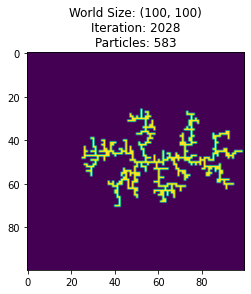

In [73]:
big_DLA = DLA(lattice_width=100)
big_DLA.animate()

## 1) L = 61

In [74]:
L = 61
DLA_sim = DLA(lattice_width=L)
N_bins = 8
N_sim = 100
min_size = 0.1 * L/2
max_size = 0.65 * L/2
freq_array = np.zeros(N_bins)

for _ in range(N_sim):
    DLA_sim.reset()
    while not DLA_sim.complete:
        DLA_sim.iterate()
    r = DLA_sim.get_radius()
    r.sort()
    count, bin_edg = np.histogram(r, range=(min_size, max_size), bins=N_bins)
    freq_array += np.cumsum(count)

DLA_CDF = freq_array / N_sim

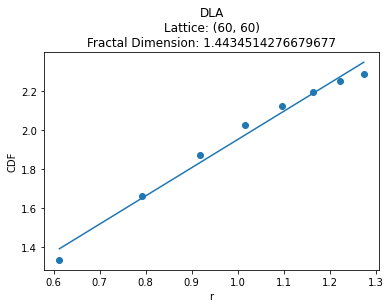

In [75]:

x_discrete = (bin_edg[1:] + bin_edg[0:-1]) /  2
regress = linregress(np.log10(x_discrete), np.log10(DLA_CDF))

x = np.log10(np.linspace(x_discrete[0], x_discrete[-1], 200))
y = regress.slope * x + regress.intercept
plt.title("DLA\nLattice: {}\nFractal Dimension: {}".format(DLA_sim.lattice_dim, regress.slope))
plt.ylabel("CDF")
plt.xlabel("r")
plt.plot(x, y)
plt.scatter(np.log10(x_discrete), np.log10(DLA_CDF))

plt.show()

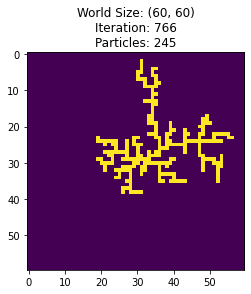

In [76]:
DLA_sim.plot()


## 2) L = 101

The fractal dimension appears to change significantly with increasing lattice size.

In [77]:
L = 101
DLA_sim = DLA(lattice_width=L)
N_bins = 8
N_sim = 100
min_size = 0.1 * L/2
max_size = 0.65 * L/2
freq_array = np.zeros(N_bins)

for _ in range(N_sim):
    DLA_sim.reset()
    while not DLA_sim.complete:
        DLA_sim.iterate()
    r = DLA_sim.get_radius()
    r.sort()
    count, bin_edg = np.histogram(r, range=(min_size, max_size), bins=N_bins)
    freq_array += np.cumsum(count)

DLA_CDF = freq_array / N_sim

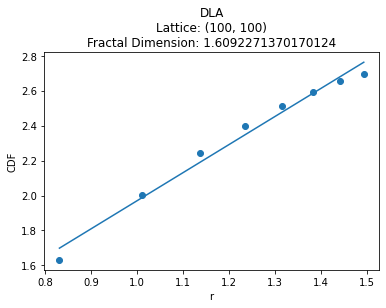

In [78]:

x_discrete = (bin_edg[1:] + bin_edg[0:-1]) /  2
regress = linregress(np.log10(x_discrete), np.log10(DLA_CDF))

x = np.log10(np.linspace(x_discrete[0], x_discrete[-1], 200))
y = regress.slope * x + regress.intercept
plt.title("DLA\nLattice: {}\nFractal Dimension: {}".format(DLA_sim.lattice_dim, regress.slope))
plt.ylabel("CDF")
plt.xlabel("r")
plt.plot(x, y)
plt.scatter(np.log10(x_discrete), np.log10(DLA_CDF))

plt.show()

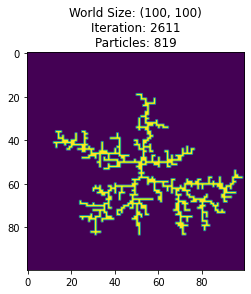

In [79]:
DLA_sim.plot()


## Leath Cluster

In [80]:

class Leath:
    """
    Grows Leath Cluster until entire perimeter is dead.
    """
    def __init__(self, world_size=40, probability=0.5):
        self.world_size = world_size
        self.lattice_dim = (world_size, world_size)
        self.probability = probability
        self.lattice = np.zeros((world_size, world_size), dtype=np.int8).tolist()
        self.lattice[world_size//2][world_size//2] = 2
        self.perimeter = {(world_size//2 + 1, world_size//2),
                          (world_size//2 - 1, world_size//2),
                          (world_size//2, world_size//2 + 1),
                          (world_size//2, world_size//2 - 1),
                          }
        self.new_points = set()
        self.cycles = 0
        self.num_particles = 1
        self.complete = False

    def reset(self):
        """
        Resets the initial parameters of the simulation.

        :return: None
        """
        self.__init__(world_size=self.world_size, probability=self.probability)
        return None


    def iterate(self):
        """
        Iterate through lattice.
        cluster = 2, dead = 1, unexplored = 0
        First, evaluate current perimeter set.
        Next, update new perimeter set.

        :return: None
        """
        self.evaluate_perimeter()
        self.update_perimeter()
        self.cycles += 1

        return None

    def evaluate_perimeter(self):
        """
        Iterate through perimeter and update cluster if sampled probability is above probability threshold
        self.probability.

        :return: None
        """

        for point in self.perimeter:

            if np.random.sample() <= self.probability:
                self.lattice[point[0]][point[1]] = 2
                self.new_points.add(point)
                self.num_particles += 1
            else:
                self.lattice[point[0]][point[1]] = 1

        return None

    def update_perimeter(self):
        """
        Update perimeter.

        :return: None
        """
        self.perimeter.clear()

        for point in self.new_points:
            self.check_point((point[0] + 1, point[1]))
            self.check_point((point[0] - 1, point[1]))
            self.check_point((point[0], point[1] + 1))
            self.check_point((point[0], point[1] - 1))

        self.new_points.clear()

        if len(self.perimeter) == 0:
            self.complete = True

        return None

    def check_point(self, point: tuple):
        """
        Negative point coordinates cause periodic boundary conditions on left and bottom side
        due to python indexing.
        If point in world and unexplored, add to perimeter.

        :return: None
        """

        for item in point:
            if item < 0:
                return None

        try:
            if self.lattice[point[0]][point[1]] == 0:
                self.perimeter.add(point)
        except IndexError:
            pass

        return None

    def center_of_mass(self):
        """
        Gets current center of mass in lattice coordinates.

        :return tuple: (x, y)
        """
        x, y = np.where(np.array(self.lattice) == 2)
        x = np.sum(x) // self.num_particles
        y = np.sum(y) // self.num_particles
        return np.array(x, y)

    def get_radius(self):
        x_pts, y_pts = np.where(np.array(self.lattice) == 1)
        pts = []
        for x, y in zip(x_pts,y_pts):
            pts.append((x,y))
        pts = np.array(pts, dtype=np.float32)
        pts = pts - self.center_of_mass()
        r = np.sqrt(pts[:, 0] ** 2 + pts[:, 1] ** 2)
        return r

    def animate(self):
        """
        Iterate through the space until cluster is completely surrounded by dead cells.

        :return: None
        """
        plt.figure()
        while not self.complete:
            self.plot()
            self.iterate()
            sleep(0.01)
            clear_output(wait=True)
        self.plot()

        return None

    def plot(self):
        """
        Plot current lattice configuration.

        :return: None
        """
        plt.figure()
        plt.title("World Size: {}x{}\nIteration: {}".format(self.world_size,
                                                            self.world_size,
                                                            self.cycles))

        plt.imshow(self.lattice)
        plt.show()

        return None

## Non-Periodic Boundary Conditions

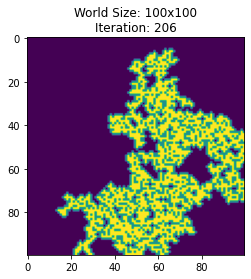

In [81]:
non_periodic = Leath(world_size=100, probability=0.5927)
non_periodic.animate()

## 1) L = 100, P = 0.5927
Fractal dimension is similar to the DLA cluster. Leath clusters, in general are noticeably denser than DLA clusters.
With P = 0.5927, spanning clusters are reliably produced.

In [82]:
L = 100
P = 0.5927
Leath_sim = Leath(world_size=L, probability=P)
N_bins = 8
N_sim = 100
min_size = 0.1 * L/2
max_size = 0.65 * L/2
freq_array = np.zeros(N_bins)

for _ in range(N_sim):
    Leath_sim.reset()
    while not Leath_sim.complete:
        Leath_sim.iterate()
    r = Leath_sim.get_radius()
    r.sort()
    count, bin_edg = np.histogram(r, range=(min_size, max_size), bins=N_bins)
    freq_array += np.cumsum(count)

Leath_CDF = freq_array / N_sim

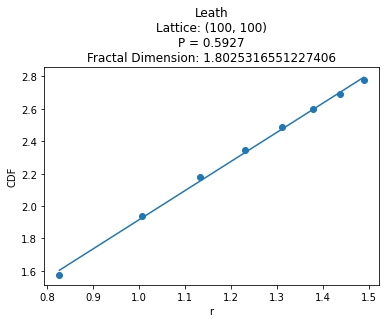

In [83]:
x_discrete = (bin_edg[1:] + bin_edg[0:-1]) /  2
regress = linregress(np.log10(x_discrete), np.log10(Leath_CDF))

x = np.log10(np.linspace(x_discrete[0], x_discrete[-1], 200))
y = regress.slope * x + regress.intercept
plt.title("Leath\nLattice: {}\nP = {}\nFractal Dimension: {}".format(Leath_sim.lattice_dim,
                                                                     Leath_sim.probability,
                                                                     regress.slope))
plt.ylabel("CDF")
plt.xlabel("r")
plt.plot(x, y)
plt.scatter(np.log10(x_discrete), np.log10(Leath_CDF))

plt.show()

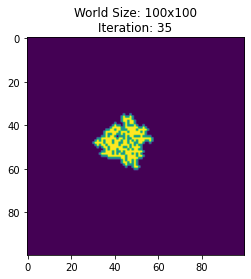

In [84]:
Leath_sim.plot()

## 1) L = 100, P = 0.65
Fractal dimension is similar to the DLA cluster. Leath clusters, in general are noticeably denser than DLA clusters.
With P = 0.65, spanning clusters are reliably produced.

In [85]:
L = 100
P = 0.65
Leath_sim = Leath(world_size=L, probability=P)
N_bins = 8
N_sim = 100
min_size = 0.1 * L/2
max_size = 0.65 * L/2
freq_array = np.zeros(N_bins)

for _ in range(N_sim):
    Leath_sim.reset()
    while not Leath_sim.complete:
        Leath_sim.iterate()
    r = Leath_sim.get_radius()
    r.sort()
    count, bin_edg = np.histogram(r, range=(min_size, max_size), bins=N_bins)
    freq_array += np.cumsum(count)

Leath_CDF = freq_array / N_sim

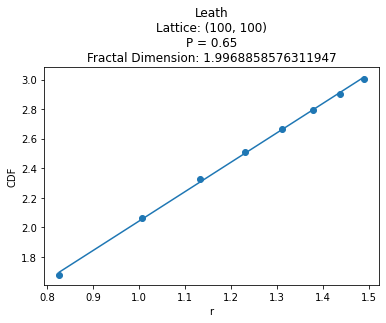

In [86]:
x_discrete = (bin_edg[1:] + bin_edg[0:-1]) /  2
regress = linregress(np.log10(x_discrete), np.log10(Leath_CDF))

x = np.log10(np.linspace(x_discrete[0], x_discrete[-1], 200))
y = regress.slope * x + regress.intercept
plt.title("Leath\nLattice: {}\nP = {}\nFractal Dimension: {}".format(Leath_sim.lattice_dim,
                                                                     Leath_sim.probability,
                                                                     regress.slope))
plt.ylabel("CDF")
plt.xlabel("r")
plt.plot(x, y)
plt.scatter(np.log10(x_discrete), np.log10(Leath_CDF))

plt.show()

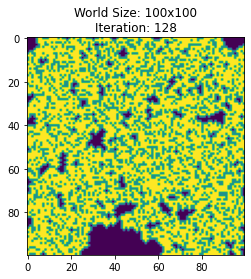

In [87]:
Leath_sim.plot()

## 1) L = 100, P = 0.80
Fractal dimension is similar to the DLA cluster. Leath clusters, in general are noticeably denser than DLA clusters.
With P = 0.80, spanning clusters are reliably produced. As expected, as we increase P, the mass of the cluster increases.

In [88]:
L = 100
P = 0.8
Leath_sim = Leath(world_size=L, probability=P)
N_bins = 8
N_sim = 100
min_size = 0.1 * L/2
max_size = 0.65 * L/2
freq_array = np.zeros(N_bins)

for _ in range(N_sim):
    Leath_sim.reset()
    while not Leath_sim.complete:
        Leath_sim.iterate()
    r = Leath_sim.get_radius()
    r.sort()
    count, bin_edg = np.histogram(r, range=(min_size, max_size), bins=N_bins)
    freq_array += np.cumsum(count)

Leath_CDF = freq_array / N_sim

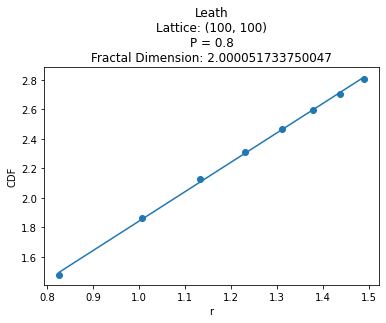

In [89]:
x_discrete = (bin_edg[1:] + bin_edg[0:-1]) /  2
regress = linregress(np.log10(x_discrete), np.log10(Leath_CDF))

x = np.log10(np.linspace(x_discrete[0], x_discrete[-1], 200))
y = regress.slope * x + regress.intercept
plt.title("Leath\nLattice: {}\nP = {}\nFractal Dimension: {}".format(Leath_sim.lattice_dim,
                                                                     Leath_sim.probability,
                                                                     regress.slope))
plt.ylabel("CDF")
plt.xlabel("r")
plt.plot(x, y)
plt.scatter(np.log10(x_discrete), np.log10(Leath_CDF))

plt.show()


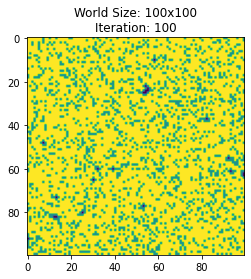

In [90]:
Leath_sim.plot()